In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
from time import sleep
from random import randint
import json
import re
import sqlite3
from selenium import webdriver
# Set driver for Chrome
options = webdriver.ChromeOptions()
options.add_argument('-headless')
options.add_argument('-no-sandbox')


In [ ]:
# Connect with .db file
conn = sqlite3.connect('C:/Users/Dang Quang/Desktop/Week2_Project/tiki.db')
cur = conn.cursor()

In [ ]:
# Get URL function

def get_url(url):
  driver = webdriver.Chrome('C:/Users/Dang Quang/Desktop/Week2_Project/chromedriver.exe',options=options)
  driver.get(url)                                            
  html_data = driver.page_source                                 
  driver.close()                                                 

  soup = BeautifulSoup(html_data, 'html.parser') 

  return soup
#_____________________________________________________________
def create_categories_table():
  query = """
      CREATE TABLE IF NOT EXISTS categories (
          id INTEGER PRIMARY KEY AUTOINCREMENT,
          name VARCHAR(255),
          url TEXT, 
          parent_id INTEGER, 
          create_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP
      )
  """
  try:
      cur.execute(query)
      conn.commit()
  except Exception as err:
      print('ERROR BY CREATE TABLE', err)
# create_categories_table()

#_____________________________________________________________

def create_products_table():
  query = """
      CREATE TABLE IF NOT EXISTS products (
          id INTEGER PRIMARY KEY AUTOINCREMENT,
          Product_name TEXT,
          price INTEGER,
          Image TEXT,
          Product_URL TEXT,
          Reviews INTEGER,
          Stars FLOAT,
          Discount TEXT,
          tikinow TEXT,
          Badge TEXT,
          Zero TEXT,
          Gift TEXT,
          main_id INTEGER,
          create_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP
      )
  """
  try:
      cur.execute(query)
      conn.commit()
  except Exception as err:
      print('ERROR BY CREATE TABLE', err)

# create_products_table()

#_____________________________________________________________

def select_query(query,conn=conn):
    return pd.read_sql_query(query, conn)

main_categories = [{'Name': 'Điện Thoại - Máy Tính Bảng', 'URL': 'https://tiki.vn/dien-thoai-may-tinh-bang/c1789?src=c.1789.hamburger_menu_fly_out_banner'},
{'Name': 'Điện Tử - Điện Lạnh', 'URL': 'https://tiki.vn/tivi-thiet-bi-nghe-nhin/c4221?src=c.4221.hamburger_menu_fly_out_banner'}, 
{'Name': 'Phụ Kiện - Thiết Bị Số', 'URL': 'https://tiki.vn/thiet-bi-kts-phu-kien-so/c1815?src=c.1815.hamburger_menu_fly_out_banner'},
{'Name': 'Laptop - Thiết bị IT', 'URL': 'https://tiki.vn/laptop-may-vi-tinh/c1846?src=c.1846.hamburger_menu_fly_out_banner'},
{'Name': 'Máy Ảnh - Quay Phim', 'URL': 'https://tiki.vn/may-anh/c1801?src=c.1801.hamburger_menu_fly_out_banner'}, 
{'Name': 'Điện Gia Dụng', 'URL': 'https://tiki.vn/dien-gia-dung/c1882?src=c.1882.hamburger_menu_fly_out_banner'}, 
{'Name': 'Nhà Cửa Đời Sống', 'URL': 'https://tiki.vn/nha-cua-doi-song/c1883?src=c.1883.hamburger_menu_fly_out_banner'}, 
{'Name': 'Hàng Tiêu Dùng - Thực Phẩm', 'URL': 'https://tiki.vn/bach-hoa-online/c4384?src=c.4384.hamburger_menu_fly_out_banner'}, 
{'Name': 'Đồ chơi, Mẹ & Bé', 'URL': 'https://tiki.vn/me-va-be/c2549?src=c.2549.hamburger_menu_fly_out_banner'}, 
{'Name': 'Làm Đẹp - Sức Khỏe', 'URL': 'https://tiki.vn/lam-dep-suc-khoe/c1520?src=c.1520.hamburger_menu_fly_out_banner'},
{'Name': 'Thể Thao - Dã Ngoại', 'URL': 'https://tiki.vn/the-thao/c1975?src=c.1975.hamburger_menu_fly_out_banner'},
{'Name': 'Xe Máy, Ô tô, Xe Đạp', 'URL': 'https://tiki.vn/o-to-xe-may-xe-dap/c8594?src=c.8594.hamburger_menu_fly_out_banner'},
{'Name': 'Hàng quốc tế', 'URL': 'https://tiki.vn/hang-quoc-te/c17166?src=c.17166.hamburger_menu_fly_out_banner'}, 
{'Name': 'Sách, VPP & Quà Tặng', 'URL': 'https://tiki.vn/nha-sach-tiki/c8322?src=c.8322.hamburger_menu_fly_out_banner'}, 
{'Name': 'Voucher - Dịch Vụ - Thẻ Cào', 'URL': 'https://tiki.vn/voucher-dich-vu/c11312?src=c.11312.hamburger_menu_fly_out_banner'}]

#_____________________________________________________________

class Product:
    def __init__(self, inp_name, inp_price, inp_img, inp_purl, inp_reviews, inp_stars, inp_discount, inp_tikinow=None, inp_badge=None, inp_zero=None, inp_gift=None, inp_main_id = None):
        self.name = inp_name
        self.price = inp_price
        self.img = inp_img
        self.purl = inp_purl
        self.reviews = inp_reviews
        self.stars = inp_stars
        self.discount = inp_discount
        self.tikinow = inp_tikinow
        self.badge = inp_badge
        self.zero = inp_zero
        self.gift = inp_gift
        self.main_id = inp_main_id
    def __repr__(self):
         return f"URL: {self.url}, Parent_ID:{self.parent_id}"
    
    def save_product(self):
        query = """
            INSERT INTO products (Product_name, price, Image, Product_URL, Reviews, Stars, Discount, tikinow, Badge, Zero, Gift, main_id)
            VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?);
        """

        val = (self.name,  self.price, self.img, self.purl, self.reviews, self.stars, self.discount, self.tikinow, self.badge, self.zero, self.gift, self.main_id)
        try:
            cur.execute(query, val)
            conn.commit()

        except Exception as err:
            print('ERROR BY INSERT:', err)

#_____________________________________________________________

class Category:
    def __init__(self, name, url, parent_id=None, cat_id=None):
        self.cat_id = cat_id
        self.name = name
        self.url = url
        self.parent_id = parent_id

    def __repr__(self):
        return f"ID: {self.cat_id}, Name: {self.name}, URL: {self.url}, Parent: {self.parent_id}"

    def save_into_db(self):
        query = """
            INSERT INTO categories (name, url, parent_id)
            VALUES (?, ?, ?);
        """
        val = (self.name, self.url, self.parent_id)
        try:
            cur.execute(query, val)
            self.cat_id = cur.lastrowid
            conn.commit()
        except Exception as err:
            print('ERROR BY INSERT:', err)

#_____________________________________________________________

def extract_tiki_info(url, parent_id = None):
  """ Extract info from all products of a specfic category on Tiki website
      Input: url
      Output: info of products, saved as list of dictionary. If no products shown, return empty list.
  """
  data = []
  soup = get_url(url)
#   main = soup.find('div', {'data-view-id':'product_list_container'})
  products = soup.find_all('a', {'class':'product-item'})
  len_products = len(products)
  print('Number of products: ' + str(len_products))
  for product in products:
      try:
        name = product.find('div', {'class':'name'}).text
        if name[0:2] == 'Ad':                                                   #product name
            name = name[2:]

        price = int(re.sub('\.', '', product.find('div', {'class':'price-discount__price'}).text[0:-1])) 

        img = product.img['src']    
                                                                                #product image
        purl = product['href']                                                  #url
        if 'tiki.vn' in purl:                                                   #some scraped URLs don't contain the Tiki.vn, so this adds them when needed
            purl = 'https:' + purl
        else:
            purl = 'https://tiki.vn' + purl

        if product.find('div', {'class':'price-discount__discount'}):           #Price Discount
            discount = product.find('div', {'class':'price-discount__discount'}).text
        else:
            discount = 'No'

        if product.find('div', {'class':'badge-service'}).img:                  #TikiNow
            tikinow = 'Yes'
        else:
            tikinow = 'No'

        if product.find('div', {'class':'badge-under-price'}).img:              #Re Hon Hoan Tien
            badge = 'Yes'
        else:
            badge = 'No'

        if product.find('div', {'class':'badge-benefits'}).img:                 #Hot price badge
            zero = 'Yes'
        else:
            zero = 'No'

        if product.find('div', {'class':'review'}):                             #Reviews
            reviews = int(product.find('div', {'class':'review'}).text[1:-1])  
        else:
            reviews = 0

        stars = 'Not available'
        if product.find('div', {'class':'rating__average'}):
            stars = int((re.search(r'\d{1,3}', product.find('div', {'class':'rating__average'})['style'])).group())/20

        gift = 'No'
        if product.find('div', {'class':'freegift-list'}):
            gift = 'Yes'

#*****
        main_id = None
        if parent_id != None:
            main_id = define_main(parent_id)


      except Exception as err:
          print('There a error when scrapping',err)
    #   d = {'Product':name, 'Price':price, 'Image':img, 'Link':purl, 'Reviews':reviews, 'Stars':stars, 'Discount':discount, 'Tikinow':tikinow, 'Badge under price':badge, 'Installment':zero, 'gift':gift, 'Main Category': main_id}
      variable = Product(name, price, img, purl, reviews, stars, discount, tikinow, badge, zero, gift, main_id)
      variable.save_product()
    #   data.append(d)
  return len_products

#_____________________________________________________________
# Get the main_id with product ID or product parent_id

def define_main(parent_id):
  if parent_id <= 15:
      return parent_id
  query = f"""
  SELECT parent_id
  FROM categories
  WHERE id = {parent_id}
  """
  p_id = int(pd.read_sql_query(query,conn).iloc[0][0])
  return define_main(p_id)

#_____________________________________________________________

def scrape_tiki(base_url, parent_id = None):
#   result = []
  page_number = 1
  main, opt = base_url.split('?')
  
  while page_number < 3:
    page = f'?page={page_number}&'
    url = main+page+opt
    print("url =", url)
    len_products = extract_tiki_info(url, parent_id)
    if len_products < 48:
        page_number = 2
    # if len(data)>0:
    #   result.extend(data)
    # else:
    #   break
    page_number += 1
    sleep(randint(1,2))

  # items = pd.DataFrame(data = result, columns = result[0].keys())
  # items.to_csv("./result2.csv", index=False)

#_____________________________________________________________

def can_add_to_cat_set(cat_name,save=False):
      if cat_name not in CATEGORY_SET:
        if save:
          CATEGORY_SET.add(cat_name)
          print(f'Added "{cat_name}" to CATEGORY_SET')
        return True
      return False

#_____________________________________________________________

def get_main_category(main_categories, save_db=False):
  result=[]
  for i in main_categories:
      _=can_add_to_cat_set(i['Name'],save_db)

      main_cat = Category(i['Name'],i['URL'])
      if save_db:
          main_cat.save_into_db()
      result.append(main_cat)
  return result

#_____________________________________________________________

def get_sub_categories(parent_category, save_db=False):
  parent_url = parent_category.url
  result = []

  try:
      soup = get_url(parent_url)
      for a in soup.find_all('a', {'class':'item item--category '}):
          name = a.text.strip()
          if can_add_to_cat_set(name,save_db): 
            sub_url = a['href']
            cat = Category(name, sub_url, parent_category.cat_id) # we now have parent_id, which is cat_id of parent category
            if save_db:
                cat.save_into_db()
            result.append(cat)
  except Exception as err:
      print('ERROR IN GETTING SUB CATEGORIES:', err)
  return result

#_____________________________________________________________

def get_all_categories(categories,save_db):
  categories = categories.copy()
  while len(categories):
      cat_to_crawl = categories[0]
      print(f'Getting {cat_to_crawl} sub-categories...')
      sub_categories = get_sub_categories(cat_to_crawl, save_db=save_db)
      print(f'Finished! {cat_to_crawl.name} has {len(sub_categories)} sub-categories')
      categories+=sub_categories
      del categories[0]


In [ ]:
CATEGORY_SET = set()
main_cat_objs = get_main_category(main_categories,save_db=True)
get_all_categories(main_cat_objs,save_db=True)

In [ ]:
# cur.execute('DROP TABLE products;')
# conn.commit()

In [ ]:
# Find all the ID that doesn't appeare on parent_id column (IS NULL) => Lowest level categories

query1 = '''
WITH lowest_sub as 
(SELECT a.url as url, a.id as parent, b.id as child
FROM categories as a
LEFT JOIN categories as b ON a.id = b.parent_id
WHERE child IS NULL)

SELECT url, parent as id
FROM lowest_sub
'''
pd.read_sql_query(query1,conn)

In [ ]:
cur.execute ('''
WITH lowest_sub as 
(SELECT a.url as url, a.id as parent, b.id as child
FROM categories as a
LEFT JOIN categories as b ON a.id = b.parent_id
WHERE child IS NULL)

SELECT url, parent as id
FROM lowest_sub
''')
text = cur.fetchall()
for i in range(len(text)):
    url = text[i][0]
    parent_id = text[i][1]
    scrape_tiki(url, parent_id)

In [ ]:
query2 = '''
SELECT *
FROM products
'''
pd.read_sql_query(query2,conn)

In [8]:
# Count number of products in each Category
query3 = '''
SELECT COUNT(p.id) as Total, p.main_id, c.name
FROM products as p
JOIN categories as c ON (c.id = p.main_id)
GROUP BY main_id
'''
pd.read_sql_query(query3,conn)

,Total,main_id,name
0,364,1,Điện Thoại - Máy Tính Bảng
1,2919,2,Điện Tử - Điện Lạnh
2,11045,3,Phụ Kiện - Thiết Bị Số
3,5205,4,Laptop - Thiết bị IT
4,3678,5,Máy Ảnh - Quay Phim
5,6443,6,Điện Gia Dụng
6,39848,7,Nhà Cửa Đời Sống
7,6231,8,Hàng Tiêu Dùng - Thực Phẩm
8,7634,9,"Đồ chơi, Mẹ & Bé"
9,5200,10,Làm Đẹp - Sức Khỏe


<AxesSubplot:xlabel='Total', ylabel='name'>

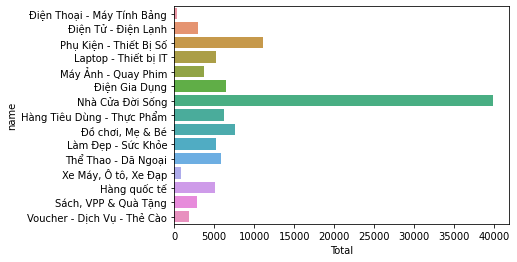

In [9]:
sns.barplot(data = pd.read_sql_query(query3,conn), x = 'Total', y = 'name')

In [11]:
# Average price of products in each Category
query4 = '''
SELECT AVG(p.price) as Average, p.Product_name, c.name as Main_category
FROM products as p
JOIN categories as c ON (c.id = p.main_id)
GROUP BY main_id
'''
pd.read_sql_query(query4,conn)

,Average,Product_name,Main_category
0,4.671876e+06,Điện Thoại Samsung Galaxy M31 (6GB/128GB) - Hà...,Điện Thoại - Máy Tính Bảng
1,6.941943e+06,Tủ lạnh mini KEMIN (Dùng cả trên oto xe hơi và...,Điện Tử - Điện Lạnh
2,6.888968e+05,Marhen.J - Bao da đựng Airpod Sorip MJ20BSORIP-PK,Phụ Kiện - Thiết Bị Số
3,3.900242e+06,Nguồn máy tính Desktop Corsair CV650 650W 80 P...,Laptop - Thiết bị IT
4,2.777028e+06,Hộp Film Fujifilm Mini 20 Tấm - Hàng Chính Hãng,Máy Ảnh - Quay Phim
5,3.026790e+06,Máy hút mùi âm tủ Hafele HH-TI60D 539.81.083 -...,Điện Gia Dụng
6,6.923786e+05,Ổ cắm Điện Quang ĐQ ESK 2W.SM750SL (5 lỗ 3 chấ...,Nhà Cửa Đời Sống
7,1.601233e+05,Nước Yến Sào win'sNest Kids (6 Lọ x 70 ml / Lốc),Hàng Tiêu Dùng - Thực Phẩm
8,2.513749e+05,2 Hộp Thực phẩm Nano Curcumin Plus++ Tinh nghệ...,"Đồ chơi, Mẹ & Bé"
9,3.820925e+05,Bộ sản phẩm Senka làm sạch và chống nắng dành ...,Làm Đẹp - Sức Khỏe


<AxesSubplot:xlabel='Average', ylabel='Main_category'>

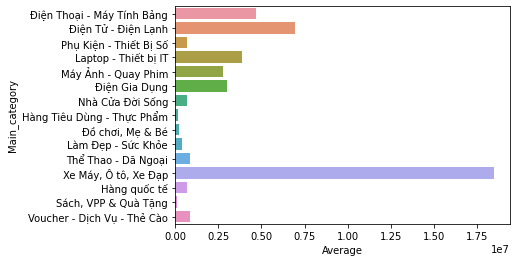

In [12]:
sns.barplot(data = pd.read_sql_query(query4,conn), x = 'Average', y = 'Main_category')

In [13]:
# Most expensive product in each Category
query4 = '''
SELECT max(p.price) as Most_expensive, p.Product_name, c.name as Main_category
FROM products as p
JOIN categories as c ON (c.id = p.main_id)
GROUP BY main_id
'''
pd.read_sql_query(query4,conn)

,Most_expensive,Product_name,Main_category
0,55880000,Surface Pro 6 Intel Core I7 Ram 16GB SSD 1TB (...,Điện Thoại - Máy Tính Bảng
1,356390000,Android Tivi Sharp 8K 80 inch 8T-80AX1X,Điện Tử - Điện Lạnh
2,76000000,Sim Số Đẹp Viettel 03333.98.555,Phụ Kiện - Thiết Bị Số
3,145000000,Máy Photocopy Fuji Xerox Màu DocuCentre-VI C22...,Laptop - Thiết bị IT
4,252000000,Máy Quay Canon EOS C300 MK II - Hàng Chính Hãng,Máy Ảnh - Quay Phim
5,392000000,Máy Làm Đá Vảy Hải Âu HAV 2200 - Hàng Chính Hãng,Điện Gia Dụng
6,225000000,Bộ bàn ghế móc đá triện trúc gỗ cẩm lai xịn 8 món,Nhà Cửa Đời Sống
7,4400000,Tổ Yến Sào Khánh Hòa Nest - 100g ( Yến Tinh Chế ),Hàng Tiêu Dùng - Thực Phẩm
8,14300000,Ván điện thể thao Homesheel A4-hàng chính hãng,"Đồ chơi, Mẹ & Bé"
9,18950000,Ghế Massage Toàn Thân Cao Cấp KING EDO 4D LUX-...,Làm Đẹp - Sức Khỏe


<AxesSubplot:xlabel='Most_expensive', ylabel='Main_category'>

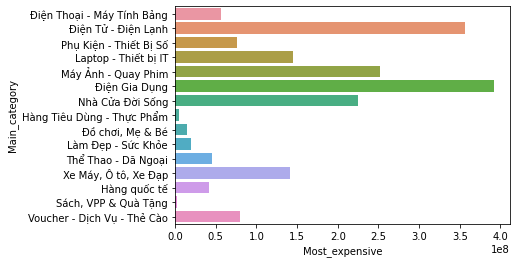

In [14]:
sns.barplot(data = pd.read_sql_query(query4,conn), x = 'Most_expensive', y = 'Main_category')

In [15]:
# Have 5 stars average and have highest number of rating
query5 = '''
SELECT max(reviews) as Highest_rating, p.Product_name, c.name as Main_category
FROM products as p
JOIN categories as c ON (c.id = p.main_id)
WHERE p.stars = 5
GROUP BY main_id
'''
pd.read_sql_query(query5,conn)

,Highest_rating,Product_name,Main_category
0,426,Điện Thoại iPhone 12 Pro Max 128GB - Hàng Chín...,Điện Thoại - Máy Tính Bảng
1,53,Smart Tivi Casper HD 32 inch 32HX6200,Điện Tử - Điện Lạnh
2,1940,apter Sạc 1 Cổng Anker 18W / 20W PowerPort III...,Phụ Kiện - Thiết Bị Số
3,459,Phần mềm Microsoft 365 Family English APAC EM ...,Laptop - Thiết bị IT
4,28,Túi đựng máy ảnh Canon EOS- Hàng nhập khẩu,Máy Ảnh - Quay Phim
5,94,"NỒI CHIÊN KHÔNG DẦU ĐIỆN TỬ, COSORI, VỎ THÉP, ...",Điện Gia Dụng
6,1045,Bình Giữ Nhiệt Lock&Lock Two-Tone Clip Tumbler...,Nhà Cửa Đời Sống
7,652,Thùng 24 Lon Nước Ngọt Có Gas Pepsi Vị Chanh K...,Hàng Tiêu Dùng - Thực Phẩm
8,257,Bài Tarot Kèm Túi Đựng Bài – Bài Bói Tarot Chí...,"Đồ chơi, Mẹ & Bé"
9,208,Combo 6 Gel Diệt Khuẩn Tay Lifebuoy Bảo Vệ Vượ...,Làm Đẹp - Sức Khỏe


<AxesSubplot:xlabel='Highest_rating', ylabel='Main_category'>

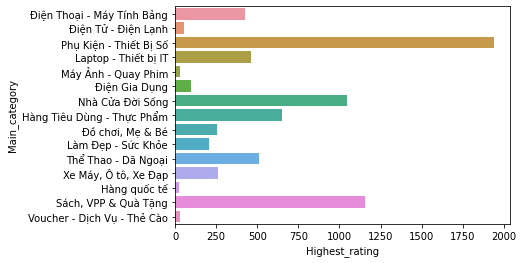

In [16]:
sns.barplot(data = pd.read_sql_query(query5,conn), x = 'Highest_rating', y = 'Main_category')

In [21]:
# Average stars of each category
query6 = '''
SELECT AVG(p.stars) as Average_rating, p.Product_name, c.name as Main_category
FROM products as p
JOIN categories as c ON (c.id = p.main_id)
WHERE p.stars BETWEEN 0 AND 5
GROUP BY main_id
'''
pd.read_sql_query(query6,conn)

,Average_rating,Product_name,Main_category
0,4.476680,Điện Thoại Samsung Galaxy M31 (6GB/128GB) - Hà...,Điện Thoại - Máy Tính Bảng
1,4.350591,Tủ lạnh mini KEMIN (Dùng cả trên oto xe hơi và...,Điện Tử - Điện Lạnh
2,4.351262,Túi Đựng Phụ Kiện Sony Extra Bass - Hàng Chính...,Phụ Kiện - Thiết Bị Số
3,4.446060,Nguồn máy tính Desktop Corsair CV650 650W 80 P...,Laptop - Thiết bị IT
4,4.334386,Hộp Film Fujifilm Mini 20 Tấm - Hàng Chính Hãng,Máy Ảnh - Quay Phim
5,4.264485,Máy hút mùi âm tủ Hafele HH-TI60D 539.81.083 -...,Điện Gia Dụng
6,4.353082,"Ổ cắm Điện Quang ECO ĐQ ESK 5WR 8ECO (8 Lỗ, dâ...",Nhà Cửa Đời Sống
7,4.587112,Nước Yến Sào win'sNest Kids (6 Lọ x 70 ml / Lốc),Hàng Tiêu Dùng - Thực Phẩm
8,4.417251,Thùng 24 Chai Sữa Nước Abbott Ensure Liquid Va...,"Đồ chơi, Mẹ & Bé"
9,4.500798,Bộ sản phẩm Senka làm sạch và chống nắng dành ...,Làm Đẹp - Sức Khỏe


<AxesSubplot:xlabel='Average_rating', ylabel='Main_category'>

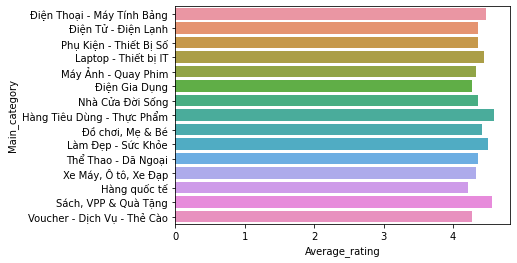

In [23]:
sns.barplot(data = pd.read_sql_query(query6,conn), x = 'Average_rating', y = 'Main_category')